In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

import cv2 
import imghdr
import os
model = Sequential()


In [85]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,True)

In [86]:
data_dir = 'data'
image_exts = ["jpeg","jpg",'bmp','img']

In [87]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            print(tip)
            print(image_exts)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))

jpeg
['jpeg', 'jpg', 'bmp', 'img']
jpeg
['jpeg', 'jpg', 'bmp', 'img']
jpeg
['jpeg', 'jpg', 'bmp', 'img']
jpeg
['jpeg', 'jpg', 'bmp', 'img']
jpeg
['jpeg', 'jpg', 'bmp', 'img']
jpeg
['jpeg', 'jpg', 'bmp', 'img']
jpeg
['jpeg', 'jpg', 'bmp', 'img']
jpeg
['jpeg', 'jpg', 'bmp', 'img']
jpeg
['jpeg', 'jpg', 'bmp', 'img']
jpeg
['jpeg', 'jpg', 'bmp', 'img']
jpeg
['jpeg', 'jpg', 'bmp', 'img']
png
['jpeg', 'jpg', 'bmp', 'img']
Image not in ext list data\happy\1HEoLBLidT2u4mhJ0oiDgig.png
jpeg
['jpeg', 'jpg', 'bmp', 'img']
jpeg
['jpeg', 'jpg', 'bmp', 'img']
jpeg
['jpeg', 'jpg', 'bmp', 'img']
png
['jpeg', 'jpg', 'bmp', 'img']
Image not in ext list data\happy\7-principles-of-successful-and-happy-people.png
jpeg
['jpeg', 'jpg', 'bmp', 'img']
jpeg
['jpeg', 'jpg', 'bmp', 'img']
jpeg
['jpeg', 'jpg', 'bmp', 'img']
png
['jpeg', 'jpg', 'bmp', 'img']
Image not in ext list data\happy\ADea4I4CgV4-hlxUOAdFjyNYonWRHO6Pu4jWXKk9BJScXws64-c-mo.jpg
jpeg
['jpeg', 'jpg', 'bmp', 'img']
jpeg
['jpeg', 'jpg', 'bmp', 'img']

In [88]:
data = tf.keras.utils.image_dataset_from_directory('data')
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()



Found 287 files belonging to 2 classes.


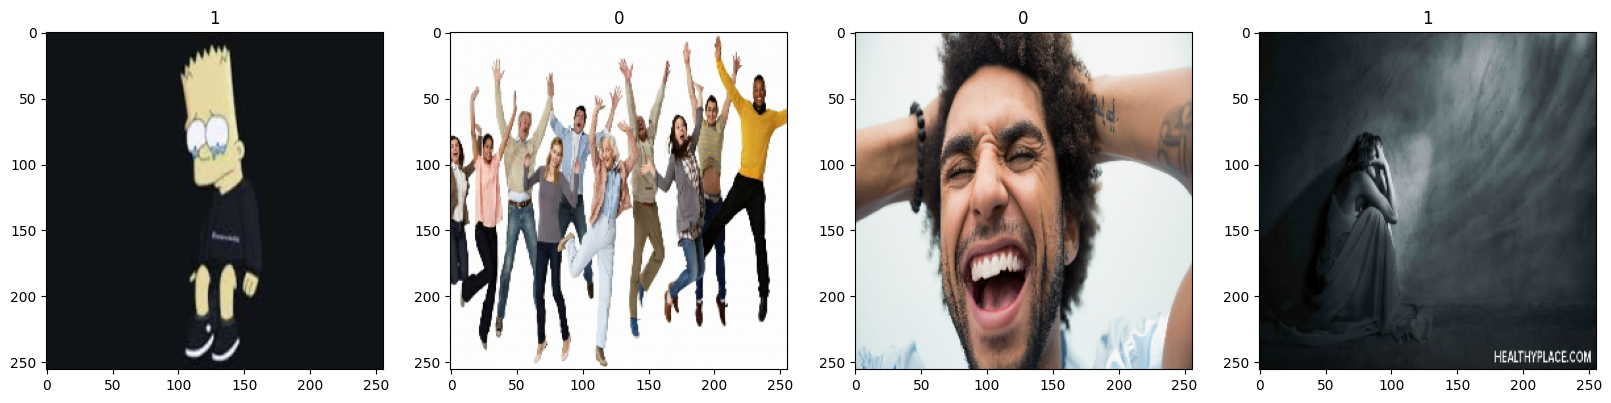

In [89]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [90]:
data = data.map(lambda x,y: (x/255, y))
data.as_numpy_iterator().next()



(array([[[[0.11670628, 0.16198635, 0.09839872],
          [0.09814106, 0.18752526, 0.08245024],
          [0.14874758, 0.2760876 , 0.13372265],
          ...,
          [0.25791338, 0.379482  , 0.21650079],
          [0.2577206 , 0.39497548, 0.23811275],
          [0.25015318, 0.38740808, 0.23054534]],
 
         [[0.14781483, 0.20228787, 0.1360348 ],
          [0.14431596, 0.23755792, 0.137649  ],
          [0.15991487, 0.2911802 , 0.1628138 ],
          ...,
          [0.25301406, 0.37458268, 0.21379837],
          [0.23575367, 0.36170343, 0.21614583],
          [0.22818628, 0.35413602, 0.20857844]],
 
         [[0.17351146, 0.23310092, 0.16514748],
          [0.11639464, 0.19838735, 0.11935484],
          [0.14397977, 0.24590993, 0.15026042],
          ...,
          [0.2435049 , 0.3624398 , 0.20955667],
          [0.21096814, 0.3317402 , 0.19371936],
          [0.21173671, 0.33250877, 0.19448793]],
 
         ...,
 
         [[0.3257865 , 0.48432532, 0.15039194],
          [0.35249

In [91]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [92]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [93]:
print(train,'\n',val,'\n',test)

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))> 
 <_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))> 
 <_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [94]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

c:\Users\AISHWARYA\Desktop\Image-Classifier\.conda\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [95]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])


In [96]:
model.summary()


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

In [97]:
logdir='logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)



In [98]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])


Epoch 1/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 327ms/step - accuracy: 0.5670 - loss: 0.8718 - val_accuracy: 0.5625 - val_loss: 0.6015
Epoch 2/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 267ms/step - accuracy: 0.5481 - loss: 0.6697 - val_accuracy: 0.6875 - val_loss: 0.6055
Epoch 3/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 281ms/step - accuracy: 0.6951 - loss: 0.5674 - val_accuracy: 0.7188 - val_loss: 0.5672
Epoch 4/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 260ms/step - accuracy: 0.7324 - loss: 0.5611 - val_accuracy: 0.7812 - val_loss: 0.4324
Epoch 5/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 273ms/step - accuracy: 0.8059 - loss: 0.4581 - val_accuracy: 0.8438 - val_loss: 0.3782
Epoch 6/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 273ms/step - accuracy: 0.8619 - loss: 0.3787 - val_accuracy: 0.7812 - val_loss: 0.3546
Epoch 7/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 271ms/step - accuracy: 0.8939 - loss: 0.3079 - val_accuracy: 0.9375 - val_loss: 0.2065
Epoch 8/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 286ms/step - accuracy: 0.8949 - loss: 0.2667 - val_accuracy: 0.8750 - val_loss:

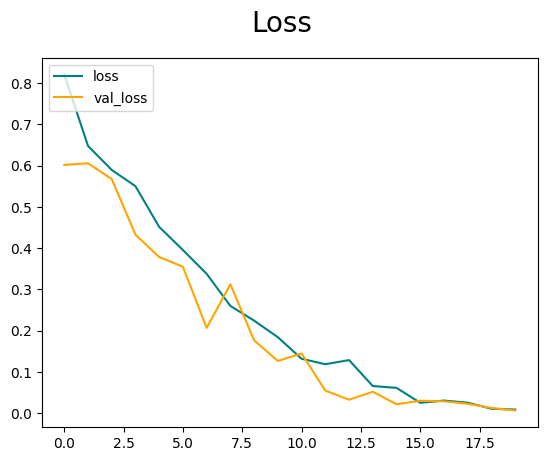

In [99]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

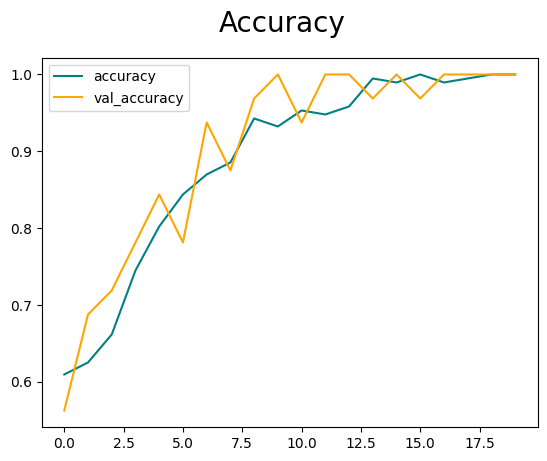

In [100]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [101]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [102]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

In [103]:
print(pre.result(), re.result(), acc.result())


tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32)


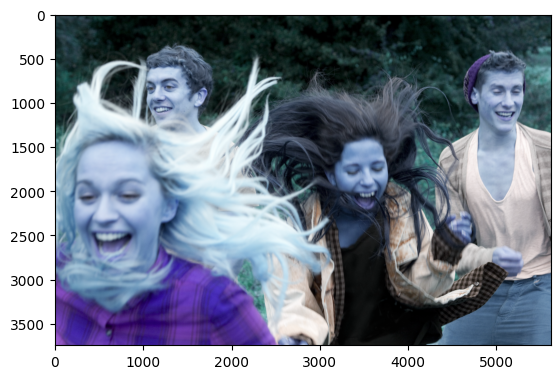

In [105]:
img = cv2.imread('data/happy/154006829.jpg')
plt.imshow(img)
plt.show()

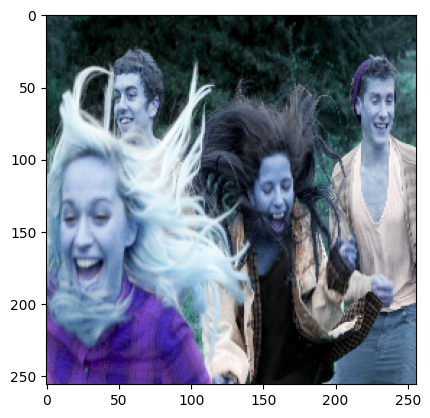

In [106]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [107]:
yhat = model.predict(np.expand_dims(resize/255, 0))
yhat

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


array([[0.14957395]], dtype=float32)

In [108]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy


In [109]:
model.save(os.path.join('models','imageclassifier.h5'))


In [111]:
new_model = load_model('models/imageclassifier.h5')


In [112]:
new_model.predict(np.expand_dims(resize/255, 0))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


array([[0.14957395]], dtype=float32)